In [43]:
import pandas as pd

# Load the Stata file
file_path = r'C:\Users\clint\Desktop\Coding Task Darthmouth\lottery_study\lottery_study\lottery_study.dta'
df = pd.read_stata(file_path)

# Display the first few rows of the dataframe
df

C:\Users\clint\AppData\Local\Temp\ipykernel_28224\2998904404.py:5: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df = pd.read_stata(file_path)


,ideology,religion,risk_seeking,expend_total,seems_fun,enjoy_thinking,self_control,risk_aversion,gender,age,...,overconfidence,lottery_payout,happiness,financial_literacy,financial_numeracy,gamblers_fallacy,non_belief_lln,ev_miscalculation,income_effects_delta_pct,state
0,Extremely Conservative,1.0,-3,0.0,-3 - Strongly Disagree,-3 - Strongly Disagree,0 - The right amount,Average financial risks expecting to earn aver...,Male,72.0,...,0.0,0.35,3.0,0.8,0.666667,0.666667,0.138633,0.50,0.0,AK
1,Moderate,0.0,-4,10.0,0 - Neutral,0 - Neutral,0 - The right amount,Average financial risks expecting to earn aver...,Female,61.0,...,1.0,0.25,5.0,1.0,1.000000,0.000000,0.427033,0.50,7.5,AK
2,Slightly Conservative,1.0,-4,0.0,0 - Neutral,1,0 - The right amount,Above-average financial risks expecting to ear...,Male,30.0,...,0.0,0.25,0.0,1.0,1.000000,0.000000,0.597033,1.00,0.0,AK
3,Slightly Liberal,0.0,-3,0.0,0 - Neutral,3 - Strongly Agree,-3 - Far too little,Above-average financial risks expecting to ear...,Female,68.0,...,0.0,0.75,9.0,0.6,0.333333,0.000000,0.510367,1.00,-50.0,AK
4,Conservative,1.0,-4,1.0,1,3 - Strongly Agree,0 - The right amount,Average financial risks expecting to earn aver...,Male,68.0,...,0.0,0.45,1.0,1.0,1.000000,0.000000,0.427033,0.75,NaN,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,Liberal,0.0,-4,10.0,2,2,0 - The right amount,Average financial risks expecting to earn aver...,Male,66.0,...,0.1,0.55,9.0,0.6,1.000000,1.000000,0.122900,0.75,0.0,WV
2886,Conservative,0.0,-7 - Very willing,10.0,1,1,0 - The right amount,Average financial risks expecting to earn aver...,Male,28.0,...,0.0,0.05,1.0,1.0,0.666667,0.000000,0.427033,1.00,0.0,WY
2887,Extremely Liberal,0.0,-4,1.0,1,1,0 - The right amount,Above-average financial risks expecting to ear...,Female,67.0,...,0.0,0.05,-1.0,1.0,0.666667,0.666667,0.460367,1.00,0.0,WY
2888,Conservative,1.0,-3,0.0,0 - Neutral,-2,0 - The right amount,Average financial risks expecting to earn aver...,Female,57.0,...,0.0,0.25,5.0,1.0,0.666667,0.666667,0.273700,0.50,0.0,WY


In [44]:
df['expend_total'] = pd.to_numeric(df['expend_total'], errors='coerce')


In [45]:
# Define the threshold for outliers
threshold = 1901.0

# Filter out the outliers
df = df[df['expend_total'] <= threshold]


In [46]:
income_gender_tabulation = pd.crosstab(df['income'], df['gender'])
income_gender_tabulation

gender,Male,Female
income,,
5.0,18,28
7.5,17,44
12.5,42,62
17.5,39,69
22.5,75,84
27.5,72,94
32.5,76,83
37.5,61,73
45.0,128,124


In [47]:
age_summary = df['age'].describe()
age_summary

count    2887.000000
mean       48.879806
std        16.901751
min        18.000000
25%        34.000000
50%        49.000000
75%        63.000000
max       145.000000
Name: age, dtype: float64

In [48]:
mean_age = age_summary['mean']
print(f"The mean age in the sample is {mean_age:.2f}")

The mean age in the sample is 48.88


In [49]:
expend_summary = df['expend_total'].describe()
expend_summary

count    2887.000000
mean       24.101489
std        88.288585
min         0.000000
25%         0.000000
50%         2.000000
75%        15.000000
max      1900.000000
Name: expend_total, dtype: float64

In [50]:


df['expenditures_share_income'] = df['expend_total'] / df['income']

C:\Users\clint\AppData\Local\Temp\ipykernel_28224\4120602394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['expenditures_share_income'] = df['expend_total'] / df['income']


In [51]:
expenditures_share_income_summary = df['expenditures_share_income'].describe()
expenditures_share_income_summary

count    2887.000000
mean        0.761211
std         3.537560
min         0.000000
25%         0.000000
50%         0.029630
75%         0.285714
max        69.090909
Name: expenditures_share_income, dtype: float64

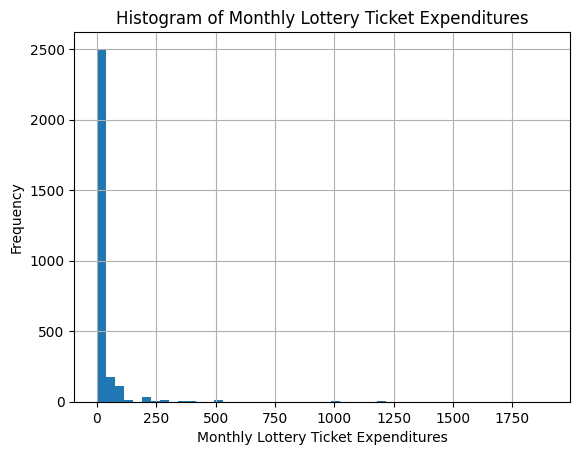

In [52]:
import matplotlib.pyplot as plt

df['expend_total'].hist(bins=50)
plt.xlabel('Monthly Lottery Ticket Expenditures')
plt.ylabel('Frequency')
plt.title('Histogram of Monthly Lottery Ticket Expenditures')
plt.show()

In [53]:
education_thresholds = [5, 10, 15, 20]

for y in education_thresholds:
    df[f'education_{y}'] = df['education'].apply(lambda x: 1 if x >= y else 0)

df[['education', 'education_5', 'education_10', 'education_15', 'education_20']]

C:\Users\clint\AppData\Local\Temp\ipykernel_28224\4115323086.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'education_{y}'] = df['education'].apply(lambda x: 1 if x >= y else 0)
C:\Users\clint\AppData\Local\Temp\ipykernel_28224\4115323086.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'education_{y}'] = df['education'].apply(lambda x: 1 if x >= y else 0)
C:\Users\clint\AppData\Local\Temp\ipykernel_28224\4115323086.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

,education,education_5,education_10,education_15,education_20
0,18.0,1,1,1,0
1,14.0,1,1,0,0
2,18.0,1,1,1,0
3,12.0,1,1,0,0
4,13.0,1,1,0,0
...,...,...,...,...,...
2885,12.0,1,1,0,0
2886,13.0,1,1,0,0
2887,20.0,1,1,1,1
2888,16.0,1,1,1,0


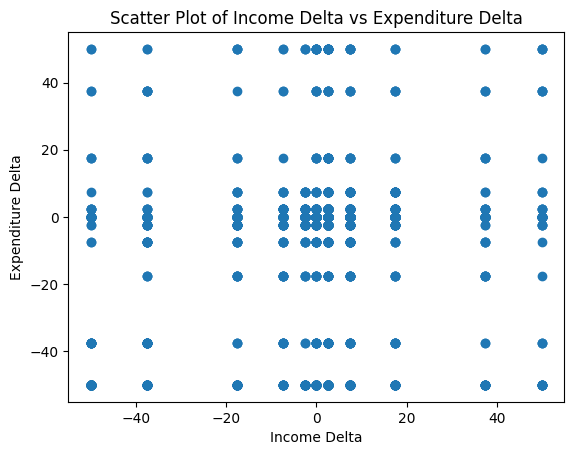

In [54]:
plt.scatter(df['income_delta'], df['expend_delta'])
plt.xlabel('Income Delta')
plt.ylabel('Expenditure Delta')
plt.title('Scatter Plot of Income Delta vs Expenditure Delta')
plt.show()

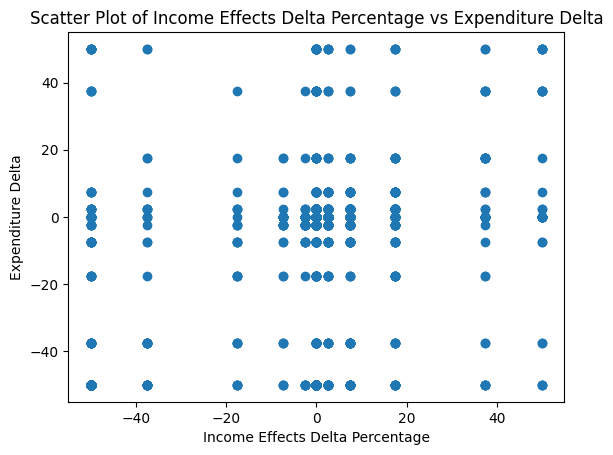

In [55]:
plt.scatter(df['income_effects_delta_pct'], df['expend_delta'])
plt.xlabel('Income Effects Delta Percentage')
plt.ylabel('Expenditure Delta')
plt.title('Scatter Plot of Income Effects Delta Percentage vs Expenditure Delta')
plt.show()

In [56]:
df.to_csv('lottery_study_updated.csv', index=False)